# Task 1

In [32]:
import pandas as pd

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    dfs[name] = pd.read_csv(path+name+endpoint)

### Code

#### 1. English name

In [33]:
dfs['products'].head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [34]:
dfs['product_category_name_translation'].head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [35]:
## get english category name

dfs['products'] = dfs['products'].merge(dfs['product_category_name_translation'],
                                        how = 'inner',
                                        on = 'product_category_name')

#### 2. Add missing delivery dates, get necessary date for subset

##### Code

In [36]:
dfs['orders'].head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [37]:
dfs['orders']['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [38]:
## get only valid orders
dfs['orders'] = dfs['orders'].loc[(dfs['orders']['order_status'] != 'canceled') & 
                                  (dfs['orders']['order_status'] != 'unavailable')]

In [39]:
## merge dataframes for product id, price, number of ordered items, reviews
dfs['orders'] = dfs['order_items'].merge(dfs['orders'], on = 'order_id', how = 'right')
dfs['orders'] = dfs['orders'].merge(dfs['order_reviews'], on='order_id', how ='left')
dfs['orders'] = dfs['orders'].merge(dfs['products'], on = 'product_id', how = 'left')

In [40]:
dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp']).dt.normalize()
dfs['orders']['order_delivered_customer_date'] = pd.to_datetime(dfs['orders']['order_delivered_customer_date']).dt.normalize()
dfs['orders']['review_creation_date'] = pd.to_datetime(dfs['orders']['review_creation_date']).dt.normalize()
dfs['orders'].rename(columns = {'order_purchase_timestamp': 'purchase_date', 
                                'order_delivered_customer_date': 'delivered_date',
                                'review_creation_date': 'review_date',
                                'product_category_name_english': 'product_category'}, inplace= True)
## fill nan values after grouping by product id so values are more reliable
dfs['orders'].sort_values(by='product_id', inplace=True)
dfs['orders']['delivered_date'].ffill(inplace=True)

C:\Users\olows\AppData\Local\Temp\ipykernel_6656\3057913044.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs['orders']['delivered_date'].ffill(inplace=True)


In [47]:
dfs['orders'].head()

order_id  order_item_id  \
103107  f30149f4a8882a08895b6a242aa0d612            1.0   
107755  f5eda0ded77c1293b04c953138c8331d            1.0   
46999   0bf736fd0fd5169d60de3699fcbcf986            1.0   
106851  3aba44d8e554ab4bb8c09f6f78032ca8            1.0   
30045   6f0dfb5b5398b271cc6bbd9ee263530e            1.0   

                              product_id                         seller_id  \
103107  00066f42aeeb9f3007548bb9d3f33c38  5670f4db5b62c43d542e1b2d56b0cf7c   
107755  00088930e925c41fd95ebfe695fd2655  7142540dd4c91e2237acb7e911c4eba2   
46999   0009406fd7479715e4bef61dd91f2462  4a3ca9315b744ce9f8e9374361493884   
106851  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
30045   000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   

        shipping_limit_date   price  freight_value  \
103107  2018-05-24 18:58:59  101.65          18.59   
107755  2017-12-18 19:32:19  129.90          13.93   
46999   2017-12-29 16:12:36  229.00          13.10   
106851  2018-08-16 13:35:21   58.90          19.60   
30045   2018-08-07 22:15:19   58.90          19.60   

                             customer_id order_status purchase_date  ...  \
103107  86c180c33f454b35e1596a99da3dddc4    delivered    2018-05-20  ...   
107755  68f2b37558e27791155db34bcded5ac0    delivered    2017-12-12  ...   
46999   6cd217b674e22cf568f6a2cf6060fd07    delivered    2017-12-21  ...   
106851  82b838f513e00463174cc7cae7e76c1f    delivered    2018-08-10  ...   
30045   8517e7c86998bf39a540087da6f115d9    delivered    2018-08-01  ...   

        product_category_name product_name_lenght product_description_lenght  \
103107             perfumaria                53.0                      596.0   
107755             automotivo                56.0                      752.0   
46999         cama_mesa_banho                50.0                      266.0   
106851  utilidades_domesticas                25.0                      364.0   
30045   utilidades_domesticas                25.0                      364.0   

       product_photos_qty product_weight_g  product_length_cm  \
103107                6.0            300.0               20.0   
107755                4.0           1225.0               55.0   
46999                 2.0            300.0               45.0   
106851                3.0            550.0               19.0   
30045                 3.0            550.0               19.0   

       product_height_cm product_width_cm product_category delivery_time  
103107              16.0             16.0        perfumery            17  
107755              10.0             26.0             auto            11  
46999               15.0             35.0   bed_bath_table            16  
106851              24.0             12.0       housewares             7  
30045               24.0             12.0       housewares             6  

[5 rows x 30 columns]

In [72]:
dfs['orders']['delivery_time'] = (dfs['orders']['delivered_date'] - dfs['orders']['purchase_date']).dt.days

review_score = dfs['orders'].groupby('product_category').apply(
    lambda x: x.set_index('review_date').resample('D')['review_score'].mean().rolling(window='14D').mean()
).reset_index()

review_score.rename(columns={'review_score': 'avg_review_score_from_last_14_days',
                             'review_date': 'purchase_date'}, inplace= True)

daily_sales = dfs['orders'].groupby(['product_category', 
                                     'purchase_date']).agg({'order_id': 'count', 
                                                                                'price': 'mean', 
                                                                                'freight_value': 'mean',
                                                                                'delivery_time': 'mean'}
                                                          ).reset_index()

daily_sales.rename(columns={'order_id': 'daily_sales'}, inplace= True)

daily_sales = daily_sales.merge(review_score, how='left', on=['product_category', 'purchase_date'])

def day_shift(df, shift):
    for lag in range(1, shift+1):
        df[f'sales_{lag}_day_ago'] = df['daily_sales'].shift(lag)
    return df

shift = 14

daily_sales = day_shift(daily_sales, shift)
daily_sales.dropna()
daily_sales['month'] = daily_sales['purchase_date'].dt.month
daily_sales['day_of_month'] = daily_sales['purchase_date'].dt.day
daily_sales['day_of_week'] = daily_sales['purchase_date'].dt.dayofweek

shifted_cols = [f'sales_{lag}_day_ago' for lag in range(1, shift+1)]
features = ['month', 'delivery_time', 'day_of_week', 'price', 'freight_value', 
            'avg_review_score_from_last_14_days', 'day_of_month'] + shifted_cols
target = 'daily_sales'

C:\Users\olows\AppData\Local\Temp\ipykernel_6656\3815890096.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_score = dfs['orders'].groupby('product_category').apply(


##### Plots showing correlation between daily sales and other values

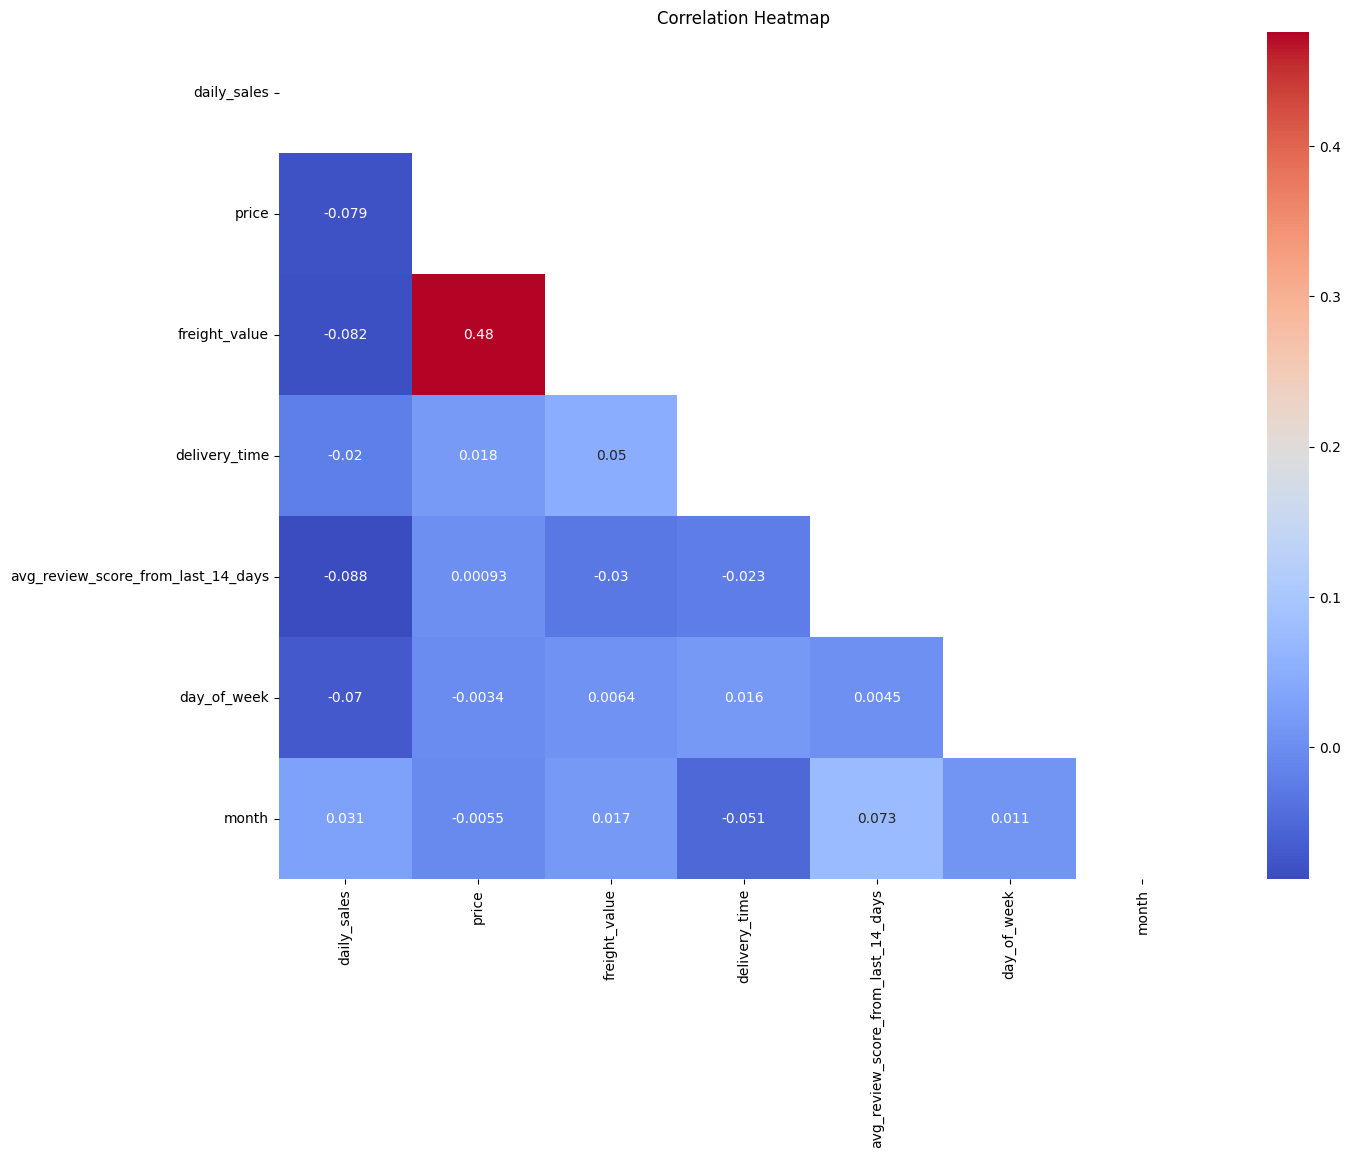

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = daily_sales[['daily_sales', 'price', 'freight_value', 'delivery_time', 'avg_review_score_from_last_14_days', 'day_of_week', 'month']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (15,11))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

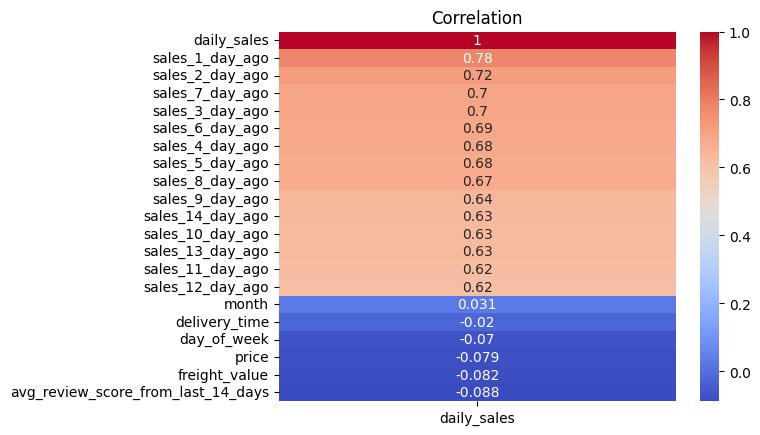

In [69]:
correlation_matrix = daily_sales[['daily_sales', 'price', 'freight_value', 'delivery_time', 'avg_review_score_from_last_14_days', 'day_of_week', 'month']+shifted_cols].corr()
sns.heatmap(correlation_matrix[['daily_sales']].sort_values(by='daily_sales', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

##### Machine Learning

In [70]:
start_date = daily_sales['purchase_date'].min()
end_date = daily_sales['purchase_date'].max()
print(start_date, end_date)

2016-09-04 00:00:00 2018-09-03 00:00:00


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train = daily_sales[daily_sales['purchase_date'] <= '2018-04-01']
test = daily_sales[daily_sales['purchase_date'] > '2018-04-01']

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#machine learning model: randomforestregressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE: {mse_rf}')

MSE: 15.216745811997074


##### Prediction for each category

In [104]:
# predict
categories = daily_sales['product_category'].unique()

predictions_df = pd.DataFrame(columns=['date'] + list(categories))

for category in categories:
    
    category_data = daily_sales[daily_sales['product_category'] ==category]
    category_data.sort_values(by='purchase_date', inplace=True)
    end_date = category_data['purchase_date'].max()
    
    future_sale = category_data.iloc[[-1]].copy()
    future_sale = future_sale[features]
    
    next_dates = [end_date + pd.Timedelta(days=i) for i in range(1, 15)]

    category_predictions = []
    
    for date in next_dates:
        future_sale['purchase_date'] = date
        future_sale['month'] = date.month
        future_sale['day_of_month'] = date.day
        future_sale['day_of_week'] = date.dayofweek
        
        pred = model_rf.predict(future_sale[features])
        category_predictions.append(pred[0])
    
        for lag in range(14, 1, -1):
            future_sale[f'sales_{lag}_day_ago'] = future_sale[f'sales_{lag-1}_day_ago']
        future_sale['sales_1_day_ago'] = pred[0]

    predictions_df_category = pd.DataFrame({'date': next_dates, category: category_predictions})
    predictions_df = pd.concat([predictions_df, predictions_df_category], ignore_index=True)

C:\Users\olows\AppData\Local\Temp\ipykernel_6656\2916101600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data.sort_values(by='purchase_date', inplace=True)
C:\Users\olows\AppData\Local\Temp\ipykernel_6656\2916101600.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, predictions_df_category], ignore_index=True)
C:\Users\olows\AppData\Local\Temp\ipykernel_6656\2916101600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [91]:
# Print the prediction DataFrame
# Here we have prediction for every category.
# For each category last last  date was taken individually

print(predictions_df.head())

        date  agro_industry_and_commerce  air_conditioning  art  \
0 2018-08-27                        2.03               NaN  NaN   
1 2018-08-28                        2.25               NaN  NaN   
2 2018-08-29                        1.87               NaN  NaN   
3 2018-08-30                        1.85               NaN  NaN   
4 2018-08-31                        1.71               NaN  NaN   

   arts_and_craftmanship  audio  auto  baby  bed_bath_table  \
0                    NaN    NaN   NaN   NaN             NaN   
1                    NaN    NaN   NaN   NaN             NaN   
2                    NaN    NaN   NaN   NaN             NaN   
3                    NaN    NaN   NaN   NaN             NaN   
4                    NaN    NaN   NaN   NaN             NaN   

   books_general_interest  ...  security_and_services  signaling_and_security  \
0                     NaN  ...                    NaN                     NaN   
1                     NaN  ...                    NaN   

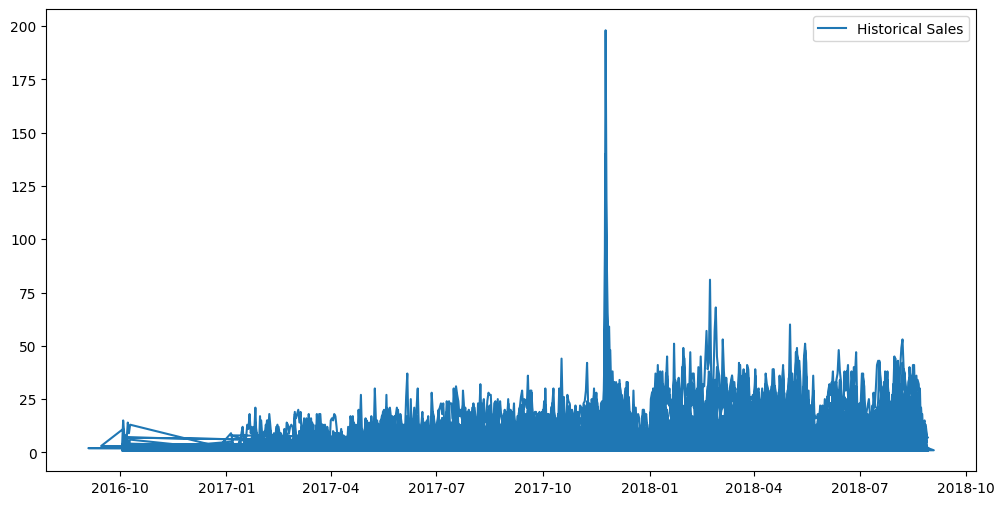

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['purchase_date'], daily_sales['daily_sales'], label='Historical Sales')
plt.legend()
plt.show()

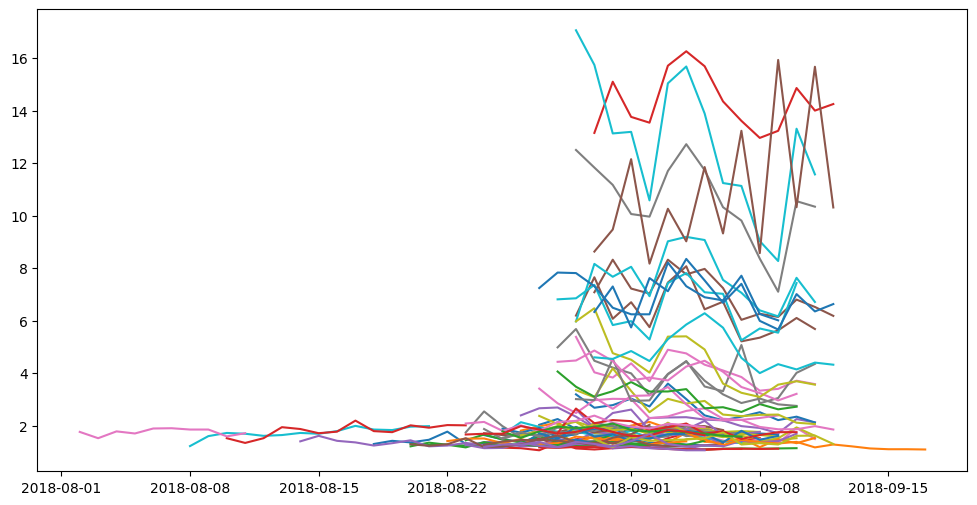

In [106]:
# Plotting the forecasts
df = predictions_df[predictions_df['date'] > '2018-08-01']
plt.figure(figsize=(12, 6))
for category in categories:
    plt.plot(df['date'], df[category], label=f'Predicted Sales for {category}')

plt.show()

##### Prediction only for categories that occured last date

In [97]:
# predict
end_date = daily_sales['purchase_date'].max()
last_date = daily_sales[daily_sales['purchase_date']==end_date]
categories = last_date['product_category'].unique()

predictions_df2 = pd.DataFrame(columns=['date'] + list(categories))

next_dates = [end_date + pd.Timedelta(days=i) for i in range(1, 15)]

for category in categories:
    
    category_data = daily_sales[daily_sales['product_category'] ==category]
    category_data.sort_values(by='purchase_date', inplace=True)
    
    future_sale = category_data.iloc[[-1]].copy()
    future_sale = future_sale[features]
    
    category_predictions = []
    
    for date in next_dates:
        future_sale['purchase_date'] = date
        future_sale['month'] = date.month
        future_sale['day_of_month'] = date.day
        future_sale['day_of_week'] = date.dayofweek
        
        pred = model_rf.predict(future_sale[features])
        category_predictions.append(pred[0])
    
        for lag in range(14, 1, -1):
            future_sale[f'sales_{lag}_day_ago'] = future_sale[f'sales_{lag-1}_day_ago']
        future_sale['sales_1_day_ago'] = pred[0]

    predictions_df_category = pd.DataFrame({'date': next_dates, category: category_predictions})
    predictions_df2 = pd.concat([predictions_df2, predictions_df_category], ignore_index=True)

C:\Users\olows\AppData\Local\Temp\ipykernel_6656\1474063055.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data.sort_values(by='purchase_date', inplace=True)
C:\Users\olows\AppData\Local\Temp\ipykernel_6656\1474063055.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, predictions_df_category], ignore_index=True)


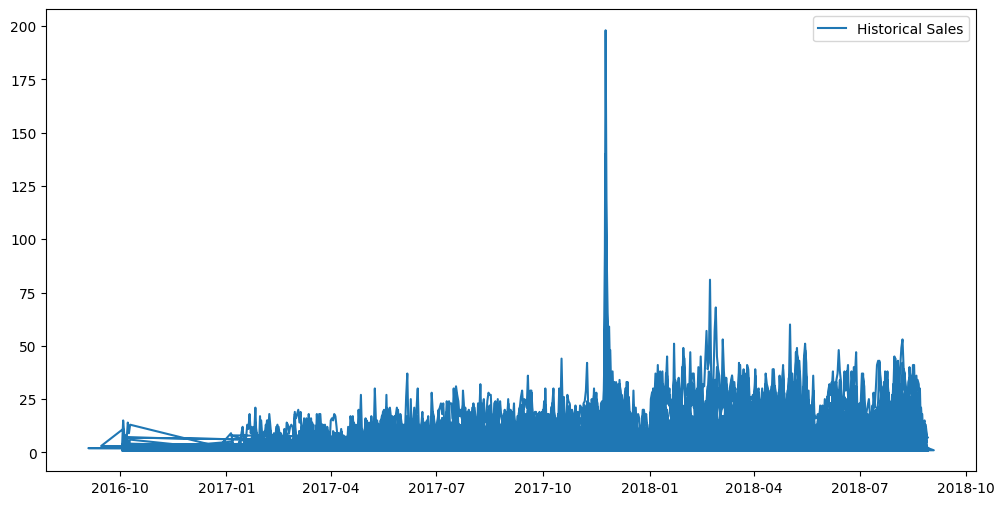

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['purchase_date'], daily_sales['daily_sales'], label='Historical Sales')
plt.legend()
plt.show()

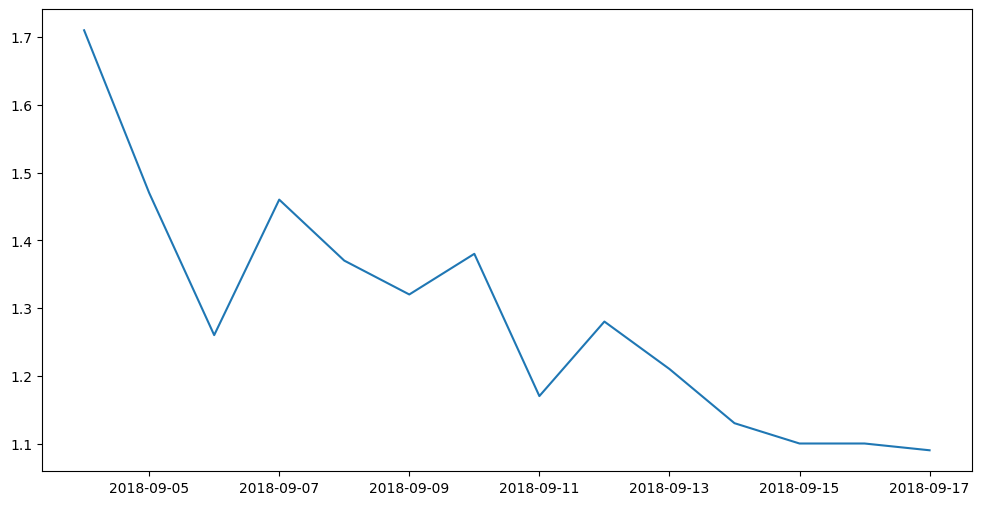

In [99]:
# Plotting the forecasts
plt.figure(figsize=(12, 6))
for category in categories:
    plt.plot(predictions_df2['date'], predictions_df2[category], label=f'Predicted Sales for {category}')

plt.show()

##### Classical time series

In [86]:
daily_sales.tail()

product_category purchase_date  daily_sales   price  freight_value  \
18439    watches_gifts    2018-08-25            3  129.85      13.883333   
18440    watches_gifts    2018-08-26            2   93.00       7.910000   
18441    watches_gifts    2018-08-27            2   48.50       7.600000   
18442    watches_gifts    2018-08-28            1   59.00       7.670000   
18443    watches_gifts    2018-08-29            2  134.40       8.200000   

       delivery_time  avg_review_score_from_last_14_days  sales_1_day_ago  \
18439       4.333333                            3.979385             11.0   
18440       3.000000                            3.998616              3.0   
18441       2.500000                            3.998616              2.0   
18442       2.000000                            3.999243              2.0   
18443       1.000000                            4.011772              1.0   

       sales_2_day_ago  sales_3_day_ago  ...  sales_8_day_ago  \
18439              9.0             12.0  ...              7.0   
18440             11.0              9.0  ...             14.0   
18441              3.0             11.0  ...              4.0   
18442              2.0              3.0  ...             12.0   
18443              2.0              2.0  ...             12.0   

       sales_9_day_ago  sales_10_day_ago  sales_11_day_ago  sales_12_day_ago  \
18439             24.0              21.0              24.0              19.0   
18440              7.0              24.0              21.0              24.0   
18441             14.0               7.0              24.0              21.0   
18442              4.0              14.0               7.0              24.0   
18443             12.0               4.0              14.0               7.0   

       sales_13_day_ago  sales_14_day_ago  month  day_of_month  day_of_week  
18439               9.0              17.0      8            25            5  
18440              19.0               9.0      8            26            6  
18441              24.0              19.0      8            27            0  
18442              21.0              24.0      8            28            1  
18443              24.0              21.0      8            29            2  

[5 rows x 24 columns]

In [12]:
## get order date, review date, delivery date and delivery time

dfs['orders']['purchase_year'] = dfs['orders']['order_purchase_timestamp'].dt.year
dfs['orders']['purchase_day'] = dfs['orders']['order_purchase_timestamp'].dt.dayofyear

dfs['orders']['review_year'] = dfs['orders']['review_creation_date'].dt.year
dfs['orders']['review_day'] = dfs['orders']['review_creation_date'].dt.dayofyear


dfs['orders']['delivery_year'] = dfs['orders']['order_delivered_customer_date'].dt.year
dfs['orders']['delivery_day'] = dfs['orders']['order_delivered_customer_date'].dt.dayofyear

## calculate delivery time (check if delivery and purchase were made in same year)
dfs['orders']['delivery_time'] = ((dfs['orders']['delivery_year'] - dfs['orders']['purchase_year'])*365 + 
                                 dfs['orders']['delivery_day'] - dfs['orders']['delivery_day'])

## if delivery and purchase years were different check if purchase year was leap
for index, row in dfs['orders'].iterrows():
    if row['purchase_year'] != row['delivery_year']:
        if row['purchase_year']%4 ==0 and row['purchase_year']%100 == 0 and row['purchase_year']%400 == 0:
            dfs['orders'].at[index, 'delivery_time'] += 1

#### 3.

In [13]:
## get data from 14 days
def is_leap(year):
    if year%4 == 0 and year%100 == 0 and year%400 == 0:
        return True
    else:
        return False

In [14]:
## get end of subset (check if it ends in following year)
def get_end(year, day_s, sub_size):
    
    if is_leap(year):
        if day_s > 366 - sub_size:
            day_e = 366 - day_s
            year_e = year + 1
        else:
            day_e = day_s + sub_size
            year_e = year
    else:
        if day_s > 365 - sub_size:
            day_e = 365 - day_s
            year_e = year + 1
        else:
            day_e = day_s + sub_size
            year_e = year
    return day_e, year_e

In [15]:
def get_historical_data(dfs, day_end, year_end, column_gb):
    
    ## income from product per order
    dfs['orders']['incomes'] = dfs['orders']['order_item_id']*dfs['orders']['price']

    ## orders till end date
    orders_bef = dfs['orders'].loc[(dfs['orders']['purchase_year'] < year_end) |
                                   ((dfs['orders']['purchase_year'] == year_end) &
                                    (dfs['orders']['purchase_day'] < day_end))]
    ## df with orders before end day
    df_bef = orders_bef.groupby(column_gb).agg({'delivery_time': 'mean', 
                                                'price': 'mean', 
                                                'order_item_id': 'sum', 
                                                'incomes': 'sum',
                                                'freight_value': 'mean'}).reset_index()    
    ## df with orders per seller before end day 
    df_bef_per_seller = orders_bef.groupby([column_gb, 'seller_id']).agg({'delivery_time': 'mean', 
                                                                          'price': 'mean', 
                                                                          'order_item_id': 'sum',
                                                                          'incomes': 'sum',
                                                                          'freight_value': 'mean'}).reset_index()
    ## reviews since sale began
    review_bef = dfs['orders'].loc[(dfs['orders']['review_year'] < year_end) |
                                   ((dfs['orders']['review_year'] == year_end) &
                                    (dfs['orders']['review_day'] < day_end))]
    
    ## df with mean reviews score for each product category since it sales began
    df_bef_reviews = review_bef.groupby(column_gb)['review_score'].mean().reset_index()

    ## merging dataframes to get proper information about product
    df_before_start_day = df_bef.merge(df_bef_reviews, on = column_gb, how = 'left')
    df_before_start_day.rename(columns={'delivery_time': 'avg_delivery_time', 
                                        'price': 'avg_price',
                                        'order_item_id' : 'number_of_sold_items',
                                        'freight_value': 'avg_freight_val',
                                        'review_score': 'avg_review_score'},
                               inplace = True)
    
    ## merging dataframes with collected informations for each seller
    df_before_start_day_per_seller = df_bef_per_seller.merge(df_bef_reviews, on = column_gb, how = 'left')
    df_before_start_day_per_seller.rename(columns={'delivery_time': 'avg_delivery_time', 
                                        'price': 'avg_price',
                                        'order_item_id' : 'number_of_sold_items',
                                        'freight_value': 'avg_freight_val',
                                        'review_score': 'avg_review_score'},
                               inplace = True)

## at the end we have 2 dataframes: 
## 1st with product information since it sales began to start day
## 2nd with product information same as in 1st one but for each seller
    return(df_before_start_day, df_before_start_day_per_seller)

In [16]:
def get_subset_data(dfs, year, day_s, sub_size, column_gb):
    
    ##calculate end of subset
    day_e, year_e = get_end(year, day_s, sub_size)

    ## income from product per order
    dfs['orders']['incomes'] = dfs['orders']['order_item_id']*dfs['orders']['price']
    
    ## orders from start date to end date
    if year == year_e:
        orders_act = dfs['orders'].loc[(dfs['orders']['purchase_year'] == year) & 
                                       (dfs['orders']['purchase_day'] >= day_s) & 
                                       (dfs['orders']['purchase_day'] <= day_e)]
    else:
        orders_act = dfs['orders'].loc[((dfs['orders']['purchase_year'] == year) & 
                                        (dfs['orders']['purchase_day'] >= day_s)) |
                                       ((dfs['orders']['purchase_year'] == year_e) & 
                                        (dfs['orders']['purchase_day'] <= day_e))]
                                        
## each dataframe consists 
##    mean values: delivery time, price and freight value
##    sum values: incomes and number of ordered items

    ## df with orders from start date to end date
    df_act = orders_act.groupby(column_gb).agg({'delivery_time': 'mean', 
                                                   'price': 'mean', 
                                                   'order_item_id': 'sum', 
                                                   'incomes': 'sum',
                                                   'freight_value': 'mean'}).reset_index()
                                
## same information collected for each seller

    ## df with orders from start date to end date
    df_act_per_seller = orders_act.groupby([column_gb, 'seller_id']).agg({'delivery_time': 'mean', 
                                                                             'price': 'mean', 
                                                                             'order_item_id': 'sum',
                                                                             'incomes': 'sum',
                                                                             'freight_value': 'mean'}).reset_index()

    ## reviews added between start and end date 
    if year == year_e:
        review_act = dfs['orders'].loc[(dfs['orders']['review_year'] == year) & 
                                       (dfs['orders']['review_day'] >= day_s) & 
                                       (dfs['orders']['review_day'] <= day_e)]
    else:
        review_act = dfs['orders'].loc[((dfs['orders']['review_year'] == year) & 
                                        (dfs['orders']['review_day'] >= day_s)) |
                                       ((dfs['orders']['review_year'] == year_e) & 
                                        (dfs['orders']['review_day'] <= day_e))]

    ## df with mean reviews score value in time period from start to end date for each product 
    df_act_reviews = review_act.groupby(column_gb)['review_score'].mean().reset_index()

## merging dataframes to get proper information about product
    df_actual = df_act.merge(df_act_reviews, on = column_gb, how = 'left')
    df_actual.rename(columns={'delivery_time': 'avg_delivery_time', 
                              'price': 'avg_price',
                              'order_item_id' : 'number_of_sold_items',
                              'freight_value': 'avg_freight_val',
                              'review_score': 'avg_review_score'},
                     inplace = True)                     

## merging dataframes with collected informations for each seller
    df_actual_per_seller = df_act_per_seller.merge(df_act_reviews, on = column_gb, how = 'left')
    df_actual_per_seller.rename(columns={'delivery_time': 'avg_delivery_time', 
                                        'price': 'avg_price',
                                        'order_item_id' : 'number_of_sold_items',
                                        'freight_value': 'avg_freight_val',
                                        'review_score': 'avg_review_score'},
                               inplace = True)

## at the end we have 2 dataframes: 
## 1st with product information from start date to end date
## 2nd with product information same as in 1st one but for each seller
    return(df_actual, df_actual_per_seller)

In [17]:
## calculate period of time for historical data
def period(day, year, year_start, day_start):

    if day < 1 or day > 366 or day_start < 1 or day_start > 366:
        raise ValueError("Day values must be between 1 and 366.")
    if year < year_start:
        raise ValueError("End year must be greater than or equal to start year.")
    
    if year == year_start:
        return day - day_start
    elif year - year_start == 1:
        if is_leap(year_start):
            return day + 366 - day_start
        else:
            return day + 365 - day_start
    else:
        if is_leap(year_start):
            days = 366 - day_start
        else:
            days = 365 - day_start
        for i in range(year-year_start-1):
            if is_leap(year_start+i+1):
                days+=366
            else:
                days+=365
        return days

In [18]:
def add_dates_subset(df, day_s, year_s, sub_size):
    day_e, year_e = get_end(year_s, day_s, sub_size)
    df['start_day'] = day_s
    df['start_year'] = year_s
    df['time_period'] = sub_size
    df['end_day'] = day_e
    df['end_year'] = year_e
    return df

In [19]:
def add_dates_historical(df, day_start, year_start, day_end, year_end):
    df['start_day'] = day_start
    df['start_year'] = year_start
    df['time_period'] = period(day_end, year_end, year_start, day_start)
    df['end_day'] = day_end
    df['end_year'] = year_end
    return df

In [23]:
def days(year):
    if is_leap(year):
        return 366
    return 365

In [28]:
year_start = dfs['orders'].sort_values(by='purchase_year')['purchase_year'].values[0]
day_start =  dfs['orders'].sort_values(by=['purchase_year', 'purchase_day'])['purchase_day'].values[0]

year_end =  dfs['orders'].sort_values(by='purchase_year', ascending = False)['purchase_year'].values[0]
day_end =  dfs['orders'].sort_values(by=['purchase_year', 'purchase_day'], 
                                     ascending = [False, False])['purchase_day'].values[0]
if day_end >= 7:
    day_end -= 7
else:
    year_end -= 1
    day_end = 365 + day_end - 7
    if is_leap(year_end):
        day_end += 1

subset_size = 14
loop = 0
start = True
is_product_new = False


if is_product_new:
    column_groupby = 'product_id'
else:
    column_groupby = 'product_category_name_english'

data = pd.DataFrame()
data_per_seller = pd.DataFrame()

## go through all years and days, start parameter let start from proper day
for year in range(year_start, year_end +1):
    days_number = days(year)
    if year == year_start:
        day = day_start
    else:
        day = 0
    while day <= days_number:
        print(f"Year: {year}, Day: {day}, Subset Size: {subset_size}")
        loop += 1
        if (day >= day_end)&(year>=year_end):
            break
        else:
            actual, actual_per_seller = get_subset_data(dfs, year, day, subset_size, column_groupby)
            actual = add_dates_subset(actual, day, year, subset_size)
            actual_per_seller = add_dates_subset(actual_per_seller, day, year, subset_size)
           
            if loop == 1:
                data = actual
                data_per_seller = actual_per_seller
            else:
                data = pd.concat([data, actual], ignore_index=True)
                data_per_seller = pd.concat([data_per_seller, actual_per_seller], ignore_index=True)
            day += subset_size
                
historical, historical_per_seller =  get_historical_data(dfs, day_end, year_end, column_groupby)
historical = add_dates_historical(historical, day_start, year_start, day_end, year_end)
historical_per_seller = add_dates_historical(historical_per_seller, day_start, year_start, day_end, year_end)
data = pd.concat([data, historical], ignore_index=True)
data_per_seller = pd.concat([data_per_seller, historical_per_seller], ignore_index=True)

Year: 2016, Day: 248, Subset Size: 14
Year: 2016, Day: 262, Subset Size: 14
Year: 2016, Day: 276, Subset Size: 14
Year: 2016, Day: 290, Subset Size: 14
Year: 2016, Day: 304, Subset Size: 14
Year: 2016, Day: 318, Subset Size: 14
Year: 2016, Day: 332, Subset Size: 14
Year: 2016, Day: 346, Subset Size: 14
Year: 2016, Day: 360, Subset Size: 14
Year: 2017, Day: 0, Subset Size: 14
Year: 2017, Day: 14, Subset Size: 14
Year: 2017, Day: 28, Subset Size: 14
Year: 2017, Day: 42, Subset Size: 14
Year: 2017, Day: 56, Subset Size: 14
Year: 2017, Day: 70, Subset Size: 14
Year: 2017, Day: 84, Subset Size: 14
Year: 2017, Day: 98, Subset Size: 14
Year: 2017, Day: 112, Subset Size: 14
Year: 2017, Day: 126, Subset Size: 14
Year: 2017, Day: 140, Subset Size: 14
Year: 2017, Day: 154, Subset Size: 14
Year: 2017, Day: 168, Subset Size: 14
Year: 2017, Day: 182, Subset Size: 14
Year: 2017, Day: 196, Subset Size: 14
Year: 2017, Day: 210, Subset Size: 14
Year: 2017, Day: 224, Subset Size: 14
Year: 2017, Day: 238,

### TIME FOR TRAIN AND TEST 
### ALSO CHECK IF NEW PRODUCT IF YES FIND SIMILIAR

In [29]:
# forecasting for old products
data.head()

product_category_name_english  avg_delivery_time   avg_price  \
0               furniture_decor         547.500000   36.445000   
1                 health_beauty           0.000000   44.990000   
2              air_conditioning         146.000000  170.709000   
3                         audio           0.000000   78.495000   
4                          auto          81.111111  156.472222   

   number_of_sold_items  incomes  avg_freight_val  avg_review_score  \
0                   3.0   105.79        31.670000               NaN   
1                   6.0   269.94         2.830000               NaN   
2                  18.0  2935.29        19.782000               NaN   
3                   2.0   156.99        13.020000               NaN   
4                   9.0  1408.25        38.245556               NaN   

   start_day  start_year  time_period  end_day  end_year  
0        248        2016           14      262      2016  
1        248        2016           14      262      2016  
2        276        2016           14      290      2016  
3        276        2016           14      290      2016  
4        276        2016           14      290      2016

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_messages['preprocessed'], review_messages['sentiment'], test_size=0.2, random_state=42)
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

review_messages['predicted_sentiment'] = model.predict(review_messages['preprocessed'])

print(f'model accuracy: {accuracy*100:.2f}%')

#print(review_messages[['predicted_sentiment', 
#                       'review_comment_message', 
#                       'sentiment', 
#                       'predicted_sentiment']].head(50))

correlation = review_messages['predicted_sentiment'].corr(review_messages['review_score'])
print(f"Correlation between predicted sentiment and rating: {correlation:.2f}")

best_reviews = review_messages[review_messages['review_score'] >= 4]
worst_reviews = review_messages[review_messages['review_score'] <= 2]

negative_fb = review_messages[review_messages['predicted_sentiment'] == 0].groupby('seller_id').filter(lambda x: len(x) == len(review_messages[review_messages['seller_id'] == x.name]))

# Task 2 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    print(name.upper())
    dfs[name] = pd.read_csv(path+name+endpoint)

dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp'])
# get english category name
dfs['products'] = dfs['products'].merge(dfs['product_category_name_translation'],
                                        how = 'inner',
                                        on = 'product_category_name')

CUSTOMERS
GEOLOCATION
ORDER_ITEMS
ORDER_PAYMENTS
ORDER_REVIEWS
ORDERS
PRODUCT_CATEGORY_NAME_TRANSLATION
PRODUCTS
SELLERS


In [8]:
## function filters data by date if necessary
def get_turnover(df, start_day, start_month, start_year, end_day, end_month, end_year):
    
    start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day)
    end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day)
    
    df_filtered = df[df['order_purchase_timestamp'].between(start_date, end_date)]
    
    return df

In [26]:
sales_areas = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')
sales_areas = sales_areas.merge(dfs['products'], on = 'product_id', how = 'left')

#### 1. the sellers with the biggest/smallest turnover

##### Code

In [41]:
# parameters

# select how many top sellers you want to see
top = 10

## select time period for turnover per seller
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

In [44]:
turnover = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')

# get amount for each order
turnover['total_amount'] = turnover['order_item_id']*turnover['price'] + turnover['order_item_id']*turnover['freight_value']

if start_year !=0 and end_year !=0:
    turnover_df = get_turnover(turnover, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    turnover_df = turnover

# get total incomes per seller
turnover_per_seller = turnover_df.groupby('seller_id')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending = False)
turnover_per_seller = turnover_per_seller.merge(dfs['sellers'], on = 'seller_id', how = 'left')  

if top < turnover_per_seller.size:
    print(f'top {top} sellers with biggest turnover: \n', turnover_per_seller.head(top), '\n')
    print(f'top {top} sellers with smallest turnover: \n', turnover_per_seller.tail(top))
else:
    print('sellers turnover: \n', turnover_per_seller)

top 10 sellers with biggest turnover: 
                           seller_id  total_amount  seller_zip_code_prefix  \
0  7c67e1448b00f6e969d365cea6b010ab     375389.31                    8577   
1  4a3ca9315b744ce9f8e9374361493884     266660.94                   14940   
2  53243585a1d6dc2643021fd1853d8905     260379.81                   42738   
3  4869f7a5dfa277a7dca6462dcf3b52b2     256418.18                   14840   
4  1025f0e2d44d7041d6cf58b6550e0bfa     240516.24                    3204   
5  da8622b14eb17ae2831f4ac5b9dab84a     228418.57                   13405   
6  1f50f920176fa81dab994f9023523100     214499.35                   15025   
7  fa1c13f2614d7b5c4749cbc52fecda94     205775.24                   13170   
8  955fee9216a65b617aa5c0531780ce60     198078.49                    4782   
9  7e93a43ef30c4f03f38b393420bc753a     184320.77                    6429   

             seller_city seller_state  
0        itaquaquecetuba           SP  
1               ibitinga        

##### Plots

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\4089717835.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


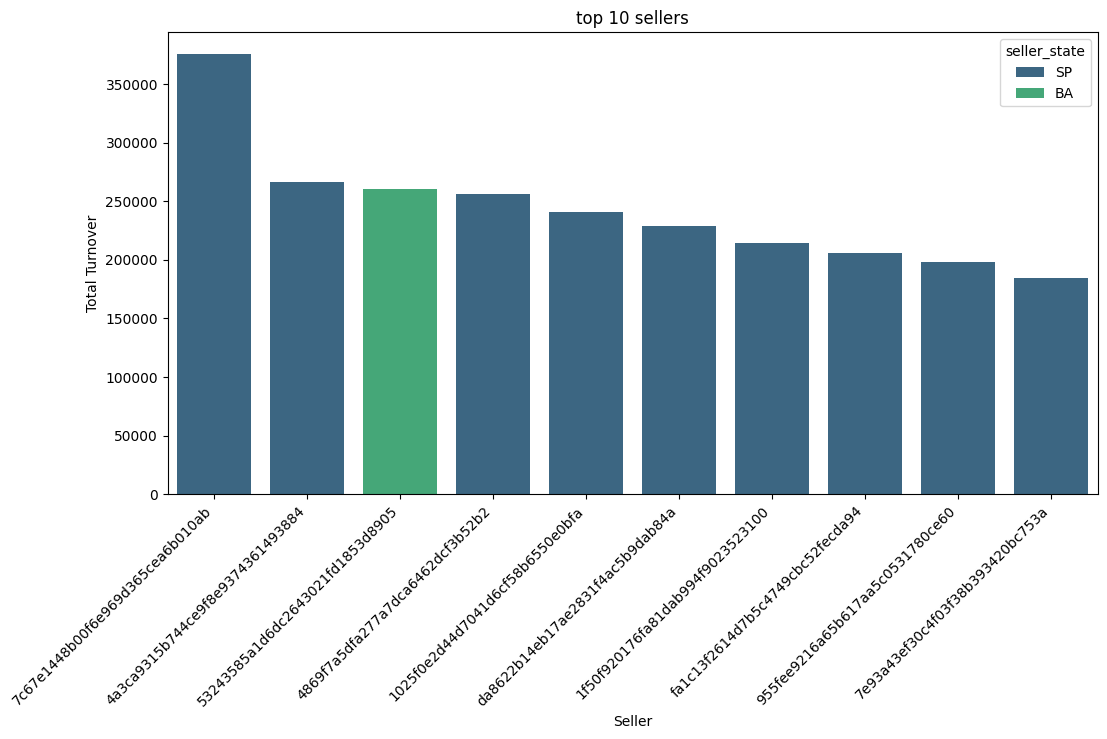

In [49]:
# Leaders
leaders_plt = turnover_per_seller.head(top)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_id', y='total_amount', data=leaders_plt, palette='viridis', hue='seller_state')
plt.title(f'top {top} sellers')
plt.xlabel('Seller')
plt.ylabel('Total Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\4245486627.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


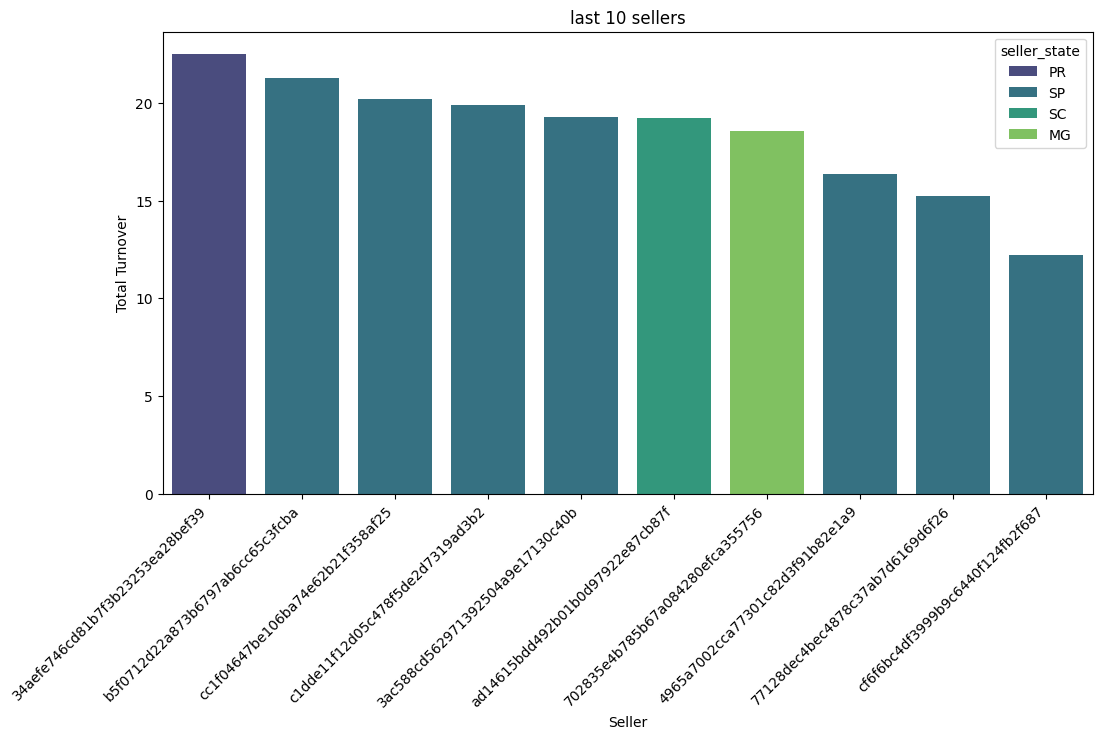

In [50]:
# Losers
leaders_plt = turnover_per_seller.tail(top)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_id', y='total_amount', data=leaders_plt, palette='viridis', hue='seller_state')
plt.title(f'last {top} sellers')
plt.xlabel('Seller')
plt.ylabel('Total Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### 2. leaders/outsiders in sales in each area 

##### Code

In [51]:
# parameters

# select how many top sellers you want to see
top = 3

## select time period for turnover per seller
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

# select categories you want to see leaders and outsiders in
# you can select one category as string or many as list
# if other type will be provided you will see leaders and outsiders for all categories
category = ['art', 'auto']

In [53]:
if start_year !=0 and end_year !=0:
    sales_areas_df = get_turnover(sales_areas, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    sales_areas_df = sales_areas

In [54]:
all_categories = sales_areas_df['product_category_name_english'].unique()
all_categories = all_categories.astype(str)
all_categories = np.sort(all_categories)
for el in all_categories:
    print(el)

agro_industry_and_commerce
air_conditioning
art
arts_and_craftmanship
audio
auto
baby
bed_bath_table
books_general_interest
books_imported
books_technical
cds_dvds_musicals
christmas_supplies
cine_photo
computers
computers_accessories
consoles_games
construction_tools_construction
construction_tools_lights
construction_tools_safety
cool_stuff
costruction_tools_garden
costruction_tools_tools
diapers_and_hygiene
drinks
dvds_blu_ray
electronics
fashio_female_clothing
fashion_bags_accessories
fashion_childrens_clothes
fashion_male_clothing
fashion_shoes
fashion_sport
fashion_underwear_beach
fixed_telephony
flowers
food
food_drink
furniture_bedroom
furniture_decor
furniture_living_room
furniture_mattress_and_upholstery
garden_tools
health_beauty
home_appliances
home_appliances_2
home_comfort_2
home_confort
home_construction
housewares
industry_commerce_and_business
kitchen_dining_laundry_garden_furniture
la_cuisine
luggage_accessories
market_place
music
musical_instruments
nan
office_furnit

In [55]:
def print_data(data, category_name, top):
    if top < data.size:
        print(f'top {top} leaders with biggest turnover in category {category_name}: \n', data.head(top), '\n')
        print(f'top {top} outsiders with smallest turnover in category {category_name}: \n', data.tail(top))
        # possible to print every seller that sold the same amount of item if number of such sellers is bigger than top parameter
    else:
        print(f'sellers turnover in category {category_name}: \n', data)

In [58]:
# get amount for each order
sales_areas_df['total_amount'] = sales_areas_df['order_item_id']*sales_areas_df['price'] + sales_areas_df['order_item_id']*sales_areas_df['freight_value']

turnover_per_category_seller = sales_areas_df.groupby(['product_category_name_english', 'seller_id'])['total_amount'].sum().reset_index()
turnover_per_category_seller = turnover_per_category_seller.merge(dfs['sellers'], on = 'seller_id', how = 'left')  

if isinstance(category, list):
    for el in category:
        category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == el].sort_values(by='total_amount', ascending= False)
        print_data(category_data, el, top)
        print('\n')
elif isinstance(category, str):
    category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == category].sort_values(by='total_amount', ascending= False)
    print_data(category_data, category, top)

else:
    for el in all_categories:
        category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == el].sort_values(by='total_amount', ascending= False)
        print_data(category_data, el, top)
        print('\n')

top 3 leaders with biggest turnover in category art: 
     product_category_name_english                         seller_id  \
116                           art  c31eff8334d6b3047ed34bebd4d62c36   
120                           art  ee27a8f15b1dded4d213a468ba4eb391   
109                           art  a0e19590a0923cdd0614ea9427713ced   

     total_amount  seller_zip_code_prefix           seller_city seller_state  
116      13389.07                   13322                 salto           SP  
120       6726.66                   74210               goiania           GO  
109       1263.52                   83075  sao jose dos pinhais           PR   

top 3 outsiders with smallest turnover in category art: 
     product_category_name_english                         seller_id  \
100                           art  6614814a00d344b846ae209f95ee7e3f   
121                           art  f593898ec748b7a8cb81fc04edafd98a   
117                           art  cf6f6bc4df3999b9c6440f124fb2f687   


##### Plots

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\298100872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_category_name_english', y='total_amount', data=best_sellers, palette='viridis')
C:\Users\olows\AppData\Local\Temp\ipykernel_12952\298100872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


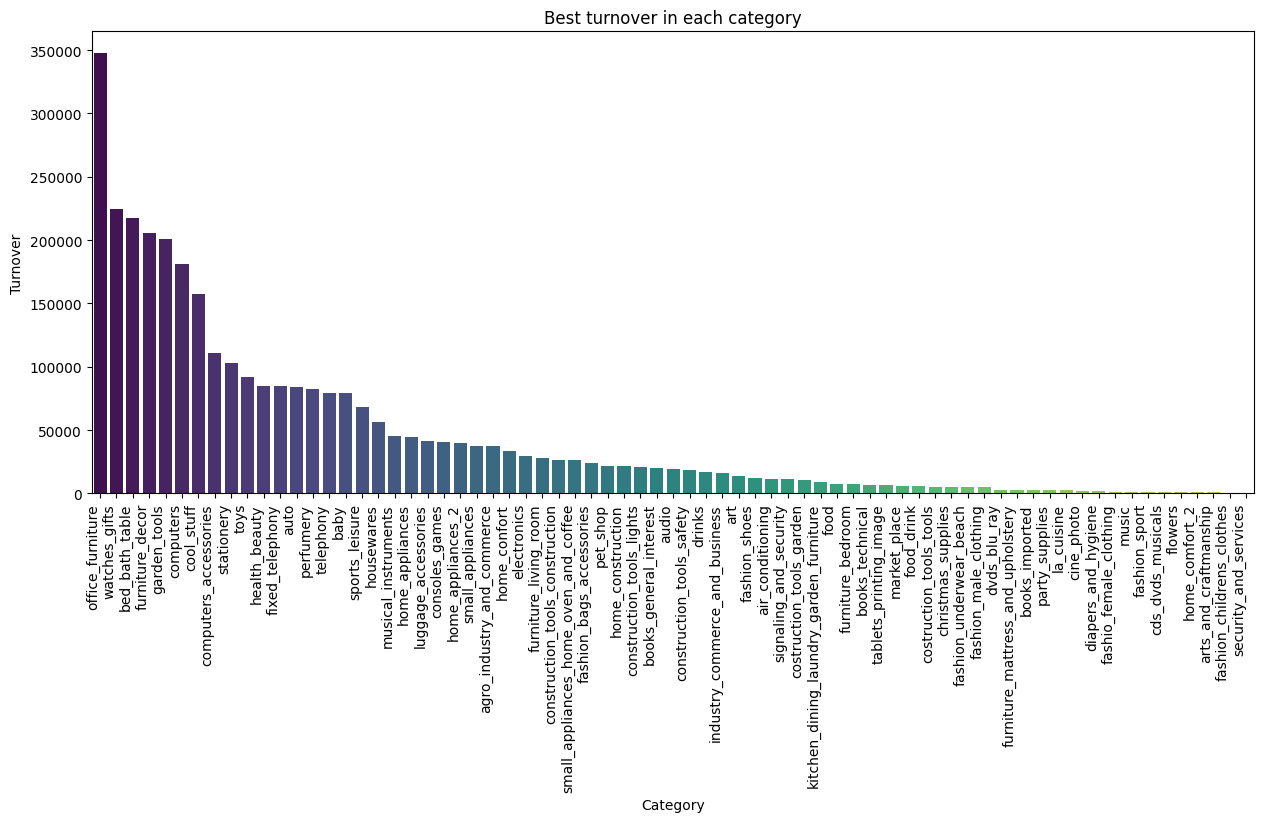

In [64]:
# highest turnover in each category
total_turnover_per_cat = sales_areas_df.groupby(['product_category_name_english', 'seller_id'])['total_amount'].sum().reset_index()
best_per_cat = total_turnover_per_cat.groupby('product_category_name_english')['total_amount'].max().reset_index().sort_values(by= 'total_amount', ascending = False)

best_sellers = pd.merge(best_per_cat, total_turnover_per_cat, on=['product_category_name_english', 'total_amount'])
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='product_category_name_english', y='total_amount', data=best_sellers, palette='viridis')
plt.title('Best turnover in each category')
plt.xlabel('Category')
plt.ylabel('Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

#### 3. which products sell best in each category

##### Code

In [28]:
all_categories = sales_areas['product_category_name_english'].unique()
all_categories = all_categories.astype(str)
all_categories = np.sort(all_categories)
for el in all_categories:
    print(el)

agro_industry_and_commerce
air_conditioning
art
arts_and_craftmanship
audio
auto
baby
bed_bath_table
books_general_interest
books_imported
books_technical
cds_dvds_musicals
christmas_supplies
cine_photo
computers
computers_accessories
consoles_games
construction_tools_construction
construction_tools_lights
construction_tools_safety
cool_stuff
costruction_tools_garden
costruction_tools_tools
diapers_and_hygiene
drinks
dvds_blu_ray
electronics
fashio_female_clothing
fashion_bags_accessories
fashion_childrens_clothes
fashion_male_clothing
fashion_shoes
fashion_sport
fashion_underwear_beach
fixed_telephony
flowers
food
food_drink
furniture_bedroom
furniture_decor
furniture_living_room
furniture_mattress_and_upholstery
garden_tools
health_beauty
home_appliances
home_appliances_2
home_comfort_2
home_confort
home_construction
housewares
industry_commerce_and_business
kitchen_dining_laundry_garden_furniture
la_cuisine
luggage_accessories
market_place
music
musical_instruments
nan
office_furnit

In [29]:
# parameters

## select time period for products sale
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

# select categories you want to see best products in
# you can select one category as a string or many as a list
# if other type will be provided you will see leaders and outsiders for all categories
category = None

In [30]:
def print_data(data, category):
    if len(data) > 0:
        sold = round(data.sort_values(by='sold_items', ascending=False)['sold_items'].values[0], 0)
        data = data.loc[data['sold_items'] == sold]
        
        if len(data) > 1:
            print(f'best-selling products in category {category} (sold {sold}): \n', data['product_id'].values)
            # possible to print every seller that sold the same amount of item if number of such sellers is bigger than top parameter
        else:
            print(f'best-selling product in category {category} (sold {sold}): \n', data['product_id'].values)
    else:
        print(f'no product sold in category {category}')

In [31]:
data = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')
data = data.merge(dfs['products'], on = 'product_id', how = 'left')

if start_year !=0 and end_year !=0:
    products_df = get_turnover(data, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    products_df = data

best_products = products_df.groupby('product_id')['order_item_id'].sum().reset_index()
best_products.rename(columns={'order_item_id': 'sold_items'}, inplace=True)
best_products = best_products.merge(dfs['products'], on = 'product_id', how = 'left')

if isinstance(category, list):
    for el in category:
        prod_data = best_products.loc[best_products['product_category_name_english'] == el]
        print_data(prod_data, el)
elif isinstance(category, str):
        prod_data = best_products.loc[best_products['product_category_name_english'] == category]
        print_data(prod_data, category)
else:
    for el in all_categories:
        prod_data = best_products.loc[best_products['product_category_name_english'] == el]
        print_data(prod_data, el)

best-selling product in category agro_industry_and_commerce (sold 23.0): 
 ['11250b0d4b709fee92441c5f34122aed']
best-selling product in category air_conditioning (sold 30.0): 
 ['f2a1b32f85cad59ff2a8444154ac25f0']
best-selling product in category art (sold 111.0): 
 ['4fe644d766c7566dbc46fb851363cb3b']
best-selling product in category arts_and_craftmanship (sold 5.0): 
 ['b9976e9c22fb1540bd71d1bcd2989475']
best-selling product in category audio (sold 49.0): 
 ['db5efde3ad0cc579b130d71c4b2db522']
best-selling product in category auto (sold 210.0): 
 ['9571759451b1d780ee7c15012ea109d4']
best-selling product in category baby (sold 95.0): 
 ['cac9e5692471a0700418aa3400b9b2b1']
best-selling product in category bed_bath_table (sold 542.0): 
 ['99a4788cb24856965c36a24e339b6058']
best-selling product in category books_general_interest (sold 61.0): 
 ['f35927953ed82e19d06ad3aac2f06353']
best-selling product in category books_imported (sold 9.0): 
 ['68ad45d48d69404aeb71ce87e1b2c948']
best-selli

##### Plots

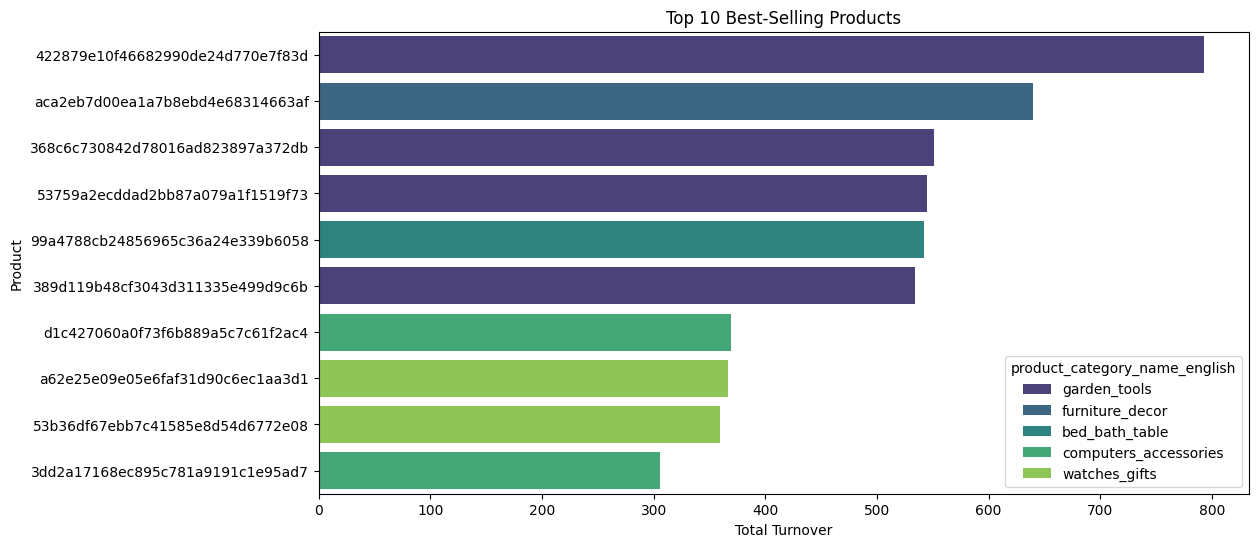

In [38]:
b_prod_plt = best_products.sort_values(by='sold_items', ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='sold_items', y='product_id', data=b_prod_plt, palette='viridis', hue='product_category_name_english')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Turnover')
plt.ylabel('Product')
plt.show()

#### 4. the dependence of product weight on turnover and price.

##### Code

In [9]:
# parameters

## select time period for products sale
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

In [12]:
task_4 = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'inner')

if start_year !=0 and end_year !=0:
    task_4 = get_turnover(task_4, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    pass

task_4['turnover'] = task_4['price']*task_4['order_item_id'] + task_4['freight_value']*task_4['order_item_id']
task_4 = task_4.groupby('product_id').agg({'turnover': 'sum', 'price': 'mean', 'freight_value': 'mean'}).reset_index()
task_4 = task_4.merge(dfs['products'], on = 'product_id', how = 'left')

##### Plots

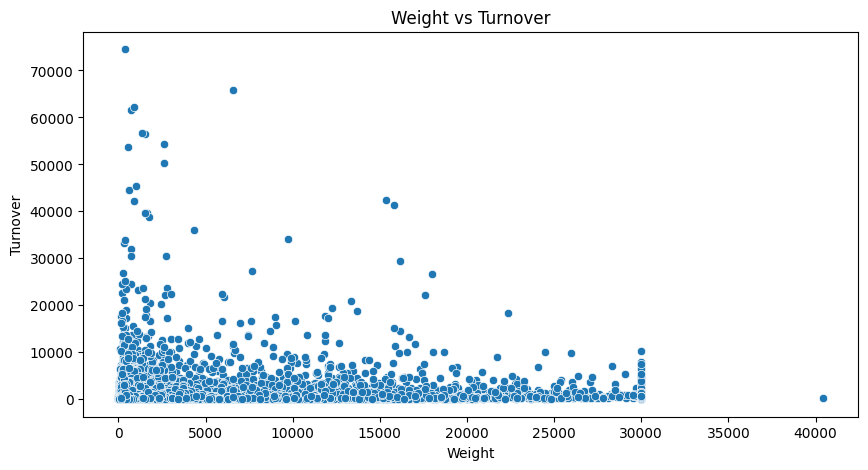

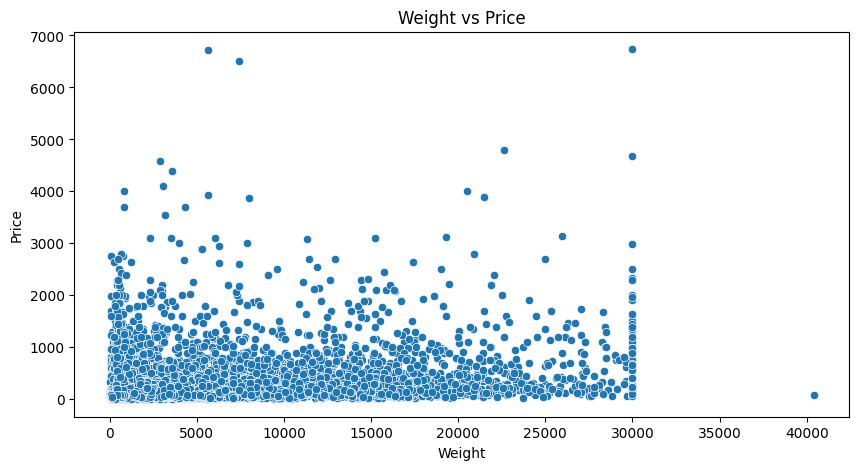

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=task_4['product_weight_g'], y=task_4['turnover'])
plt.title('Weight vs Turnover')
plt.xlabel('Weight')
plt.ylabel('Turnover')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=task_4['product_weight_g'], y=task_4['price'])
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

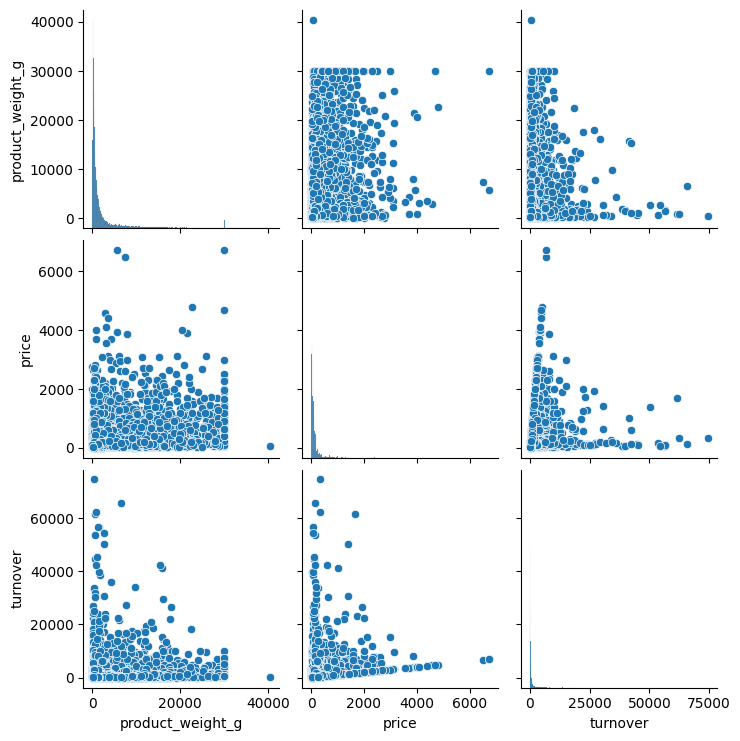

In [19]:
sns.pairplot(task_4[['product_weight_g', 'price', 'turnover']])

plt.show()

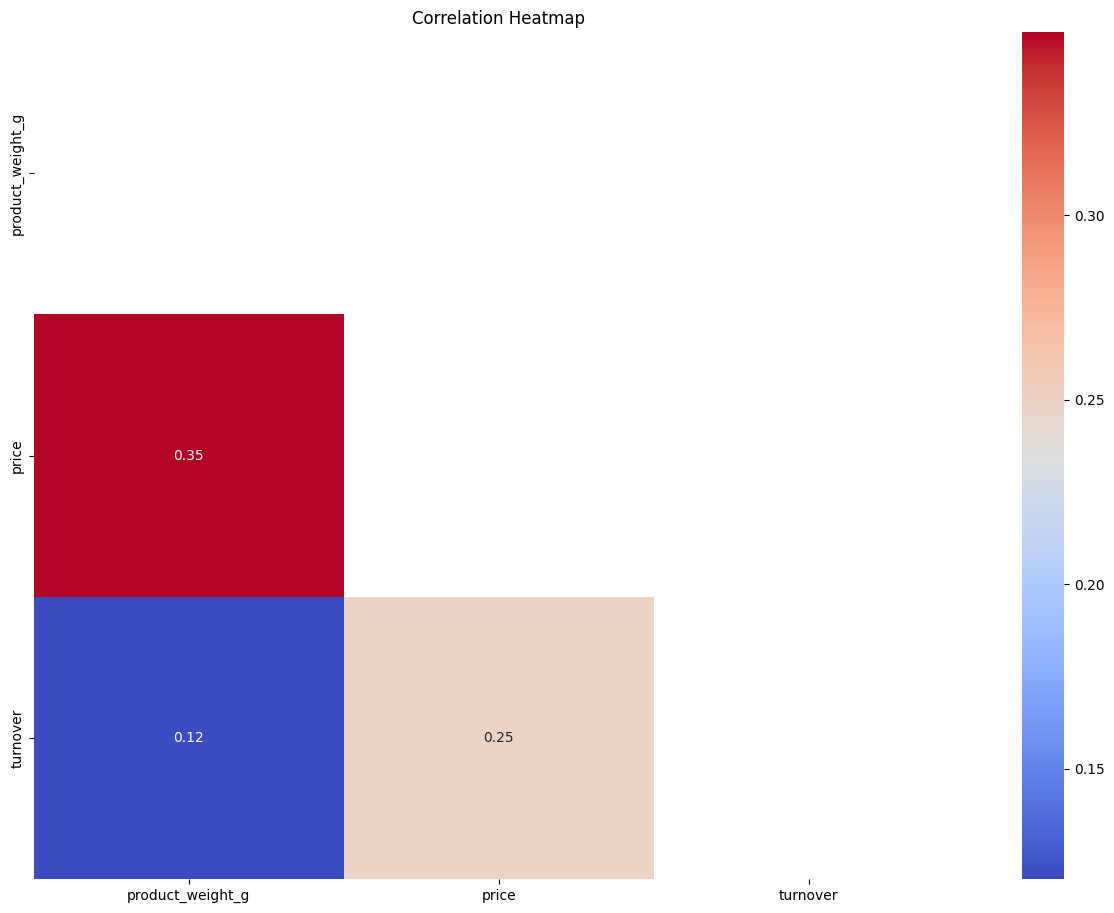

In [20]:
correlation_matrix = task_4[['product_weight_g', 'price', 'turnover']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (15,11))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between product weight, price and turnover')
plt.show()

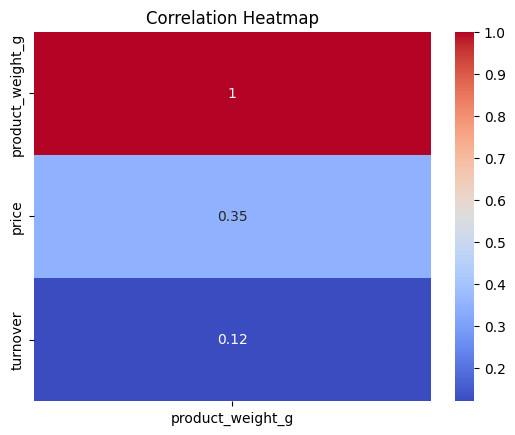

In [24]:
correlation_matrix = task_4[['product_weight_g', 'price', 'turnover']].corr()
sns.heatmap(correlation_matrix[['product_weight_g']].sort_values(by='product_weight_g', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between product weight and price product weight and turnover')
plt.show()

# Task 3

In [42]:
dfs['order_items'].head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    print(name.upper())
    dfs[name] = pd.read_csv(path+name+endpoint)

dfs['order_reviews'].head()

CUSTOMERS
GEOLOCATION
ORDER_ITEMS
ORDER_PAYMENTS
ORDER_REVIEWS
ORDERS
PRODUCT_CATEGORY_NAME_TRANSLATION
PRODUCTS
SELLERS


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [44]:
def preprocess(text, lang = 'portuguese'):

    tokens = word_tokenize(text, language=lang)

    stop_words = set(stopwords.words(lang))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [50]:
merged_df = dfs['order_reviews'].merge(dfs['order_items'], on = 'order_id')
review_messages = merged_df.dropna(subset=('review_comment_message'))
review_titles = dfs['order_reviews'].dropna(subset=(['review_comment_message', 'review_comment_title']))

In [51]:
nltk.download('punkt')
nltk.download('stopwords')

review_messages['preprocessed'] = review_messages['review_comment_message'].apply(preprocess)
review_messages['sentiment'] = review_messages['review_score'].apply(lambda x: 1 if x > 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(review_messages['preprocessed'], review_messages['sentiment'], test_size=0.2, random_state=42)
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

review_messages['predicted_sentiment'] = model.predict(review_messages['preprocessed'])

print(f'model accuracy: {accuracy*100:.2f}%')

#print(review_messages[['predicted_sentiment', 
#                       'review_comment_message', 
#                       'sentiment', 
#                       'predicted_sentiment']].head(50))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\olows\AppData\Local\Temp\ipykernel_8176\674464373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_messages['preprocessed'] = review_messages['review_comment_message'].apply(preprocess)
C:\Users\olows\AppData\Local\Temp\ipykernel_8176\674464373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

model accuracy: 88.77%


C:\Users\olows\AppData\Local\Temp\ipykernel_8176\674464373.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_messages['predicted_sentiment'] = model.predict(review_messages['preprocessed'])


In [52]:
correlation = review_messages['predicted_sentiment'].corr(review_messages['review_score'])
print(f"Correlation between predicted sentiment and rating: {correlation:.2f}")

Correlation between predicted sentiment and rating: 0.79


In [54]:
best_reviews = review_messages[review_messages['review_score'] >= 4]
worst_reviews = review_messages[review_messages['review_score'] <= 2]

negative_fb = review_messages[review_messages['predicted_sentiment'] == 0].groupby('seller_id').filter(lambda x: len(x) == len(review_messages[review_messages['seller_id'] == x.name]))

sellers with only negative feedback:
['c1d1ebb4745cc43cb6f05e9c8a705c9a' '70c4eedec9cb4a85cda2f3f9673557b4'
 'fcf16b7a8697e559f0123190bb30177d' 'dff87e4de60c9736ce8df835951b09bc'
 '35857757f553273b1056c1cabdace7fb' '1bc2e21de46adfea6b98cc96b00f3b40'
 '24c1de8d9551c0b4fbc53317d53efda8' 'b274baf5bbd142410eb2958cf685d684'
 'c53bcd3be457a342a97e39e5a9f0be22' 'fedf2c1386e137f296b3bbf3b635e69d'
 '1b65c144b17e607c0f37f10bb7dfec8d' 'eddd1991bd6d9309995a480c39b95137'
 'ab75b89cc49c9ab3160d0c91565a442a' 'c286ec035ee04ba81c97508f0b5df544'
 '9b1050e85becf3ae99c1cf4934c9bc5d' 'f44bdc12aa39f5271f0b95f66cd4c289'
 '9cad4b68bb993ee401a3c5aaa2bc26dd' '270d3ef21830ad0ecf3a6c53d08a533a'
 'e09887ca8c7bf8a4621ce481820414ef' '37ceb404da208418c9032f0674e57804'
 '3820c6537b3853be1a0687d5a60807ec' '1961c3e1272bfeceb05d0b78b5bbfdaf'
 'd1e2fe627180431ffda076abb303c56f' '324583d68897f5ddbaf38f6248322176'
 'cad9969167c09b48ae6f1d123f7fa68d' 'f9903dd0f812c7e771fcad47b6fff231'
 'e3e290b38963293022cdcd6db8328103' 'f63

In [57]:
print(f'number of sellers with only negative feedback: {len(review_messages['seller_id'].unique())}')
print('sellers with only negative feedback:')
#print(negative_fb['seller_id'].unique())

number of sellers with only negative feedback: 2567
sellers with only negative feedback:
['c1d1ebb4745cc43cb6f05e9c8a705c9a' '70c4eedec9cb4a85cda2f3f9673557b4'
 'fcf16b7a8697e559f0123190bb30177d' 'dff87e4de60c9736ce8df835951b09bc'
 '35857757f553273b1056c1cabdace7fb' '1bc2e21de46adfea6b98cc96b00f3b40'
 '24c1de8d9551c0b4fbc53317d53efda8' 'b274baf5bbd142410eb2958cf685d684'
 'c53bcd3be457a342a97e39e5a9f0be22' 'fedf2c1386e137f296b3bbf3b635e69d'
 '1b65c144b17e607c0f37f10bb7dfec8d' 'eddd1991bd6d9309995a480c39b95137'
 'ab75b89cc49c9ab3160d0c91565a442a' 'c286ec035ee04ba81c97508f0b5df544'
 '9b1050e85becf3ae99c1cf4934c9bc5d' 'f44bdc12aa39f5271f0b95f66cd4c289'
 '9cad4b68bb993ee401a3c5aaa2bc26dd' '270d3ef21830ad0ecf3a6c53d08a533a'
 'e09887ca8c7bf8a4621ce481820414ef' '37ceb404da208418c9032f0674e57804'
 '3820c6537b3853be1a0687d5a60807ec' '1961c3e1272bfeceb05d0b78b5bbfdaf'
 'd1e2fe627180431ffda076abb303c56f' '324583d68897f5ddbaf38f6248322176'
 'cad9969167c09b48ae6f1d123f7fa68d' 'f9903dd0f812c7e771fcad

In [75]:
import re

def highlight_price(review):
    if isinstance(review, str):
        return re.findall(r'\d+', review)
    else:
        return []
dfs['order_reviews']['prices'] = dfs['order_reviews']['review_comment_message'].apply(highlight_price)

prices_mentioned = dfs['order_reviews'][dfs['order_reviews']['prices'].astype(bool)]
print(f'comments with prices mentioned (number of reviews with prices: {prices_mentioned.size}')
print(prices_mentioned[['review_comment_message', 'prices']].head())

comments with prices mentioned (number of reviews with prices: 34952
                                review_comment_message  \
9    aparelho eficiente. no site a marca do aparelh...   
22                                        Loja nota 10   
51   recebi somente 1 controle Midea Split ESTILO.\...   
115  Este foi o pedido\r\nBalde Com 128 Peças - Blo...   
168  Comprei o produto dia 25 de fevereiro e hoje d...   

                              prices  
9                                [3]  
22                              [10]  
51                               [1]  
115  [128, 2, 25, 00, 36, 1, 35, 90]  
168                         [25, 29]  
